1. Use the Newton-Raphson method to determine a root of $f(x)=x^5-16.05x^4+88.75x^3-192.0375x^2+116.35x+31.6875$ using an initial guess of $x$=0.5825 and $ϵ_s$=0.01%.

In [1]:
# Provide solution here

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def newton_raphson(f, df, x0, tol):
    """
    Finds the root of a function f using the Newton-Raphson method.

    Args:
        f (function): The function f(x).
        df (function): The derivative function f'(x).
        x0 (float): The initial guess for the root.
        tol (float): The tolerance for convergence.

    Returns:
        x_new(float): The estimated(approximated) root.
        f_new(float): The value of function, func at the estimated root
    """
    x_old = x0
    x_new = x_old - f(x_old)/df(x_old)
    while abs(f(x_new) - f(x_old)) > tol:
        x_old = x_new
        x_new = x_old - f(x_old)/df(x_old)
    return x_new, f(x_new)


In [33]:
# Solving number 1 question with the newton_raphson method written in the above cell

f = lambda x: x**5 - 16.05 * x**4 + 88.75 *x**3 - 192.0375 * x**2 + 116.35 * x + 31.6875
df = lambda x: 5*x**4 - 64.2*x**3 + 266.25*x**2 - 384.075*x + 116.35
x0 = 0.5825
tol = 0.0001
newton_raphson(f, df, x0, tol)

(6.499999999999988, -5.6843418860808015e-12)

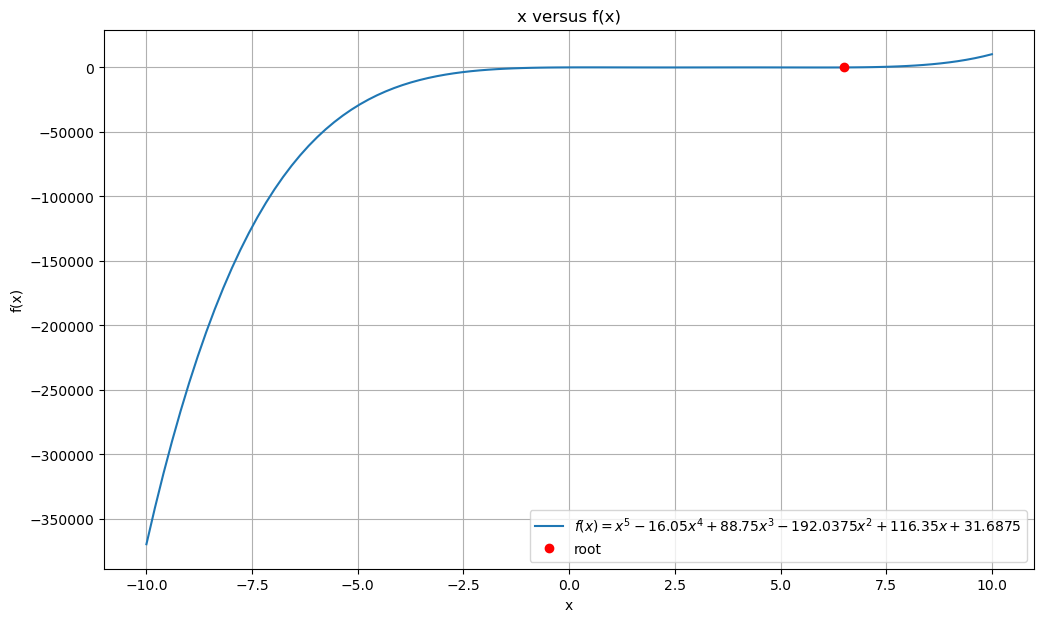

In [34]:
# Visualizing the result of the estimation
x = np.linspace(-10, 10, 100)
plt.figure(figsize= (12,7))
plt.plot(x, f(x), label = '$f(x)=x^5-16.05x^4+88.75x^3-192.0375x^2+116.35x+31.6875$')
plt.plot(6.5, f(6.5), 'ro', label = 'root')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('x versus f(x)')
plt.legend()
plt.show()

#### Question 1 answer is 6.499999999999988

2. Find the minimum value of $f(x,y)=(x-3)^2+(y-2)^2$ starting at $x$=1 and $y$=1 using the steepest descent method with a stopping criterion of $ϵ_s$=1%.

In [2]:
# Provide solution here

In [20]:
def steepest_descent(func, grad_func, x0, alpha, tol):
    '''
    Finds the minimum value of a function func using the steepest descent method.

    Args:
    func(function): The function to be minimised.
    grad_func(gradient): Gradient of the function, func.
    x0(list): The initial guess or the starting point 
    alpha(learning rate or step): Step size taken in the gradient direction
    tol(tolerance): The acceptable error for the approximation  

    Returns:
    x_new(x,y): The estimated value of x and y that yields the minimum value of the function, func
    history: An array of all the x, y and function values gotten from all the iterations
    '''
    x0 = np.array(x0)
    x_old = x0
    f_old = func(x_old)
    x_new = np.array(x_old) - alpha*grad_func(x_old)
    f_new = func(x_new)
    history_x = [x_old[0], x_new[0]]
    history_y = [x_old[1], x_new[1]]
    history_z = [f_old, f_new]
    while abs(f_new - f_old) > tol:
        x_old = x_new
        f_old = f_new
        x_new = np.array(x_old) - alpha*grad_func(x_old)
        f_new = func(x_new)
        history_x.append(x_new[0])
        history_y.append(x_new[1])
        history_z.append(f_new)
        #print(f_new)
    history = [history_x, history_y, history_z]    
    return x_new, history

In [28]:
# Solving number 2 question using the steepest_descent function written in the above cell
func = lambda x: (x[0]-3)**2 + (x[1]-2)**2
grad_func = lambda x: np.array([2*(x[0] - 3), 2*(x[1] - 2)])
x0 = [1, 1]
alpha = 0.1
tol = 0.01
x, h = steepest_descent(func, grad_func, x0, alpha, tol)
x

array([2.89004884, 1.94502442])

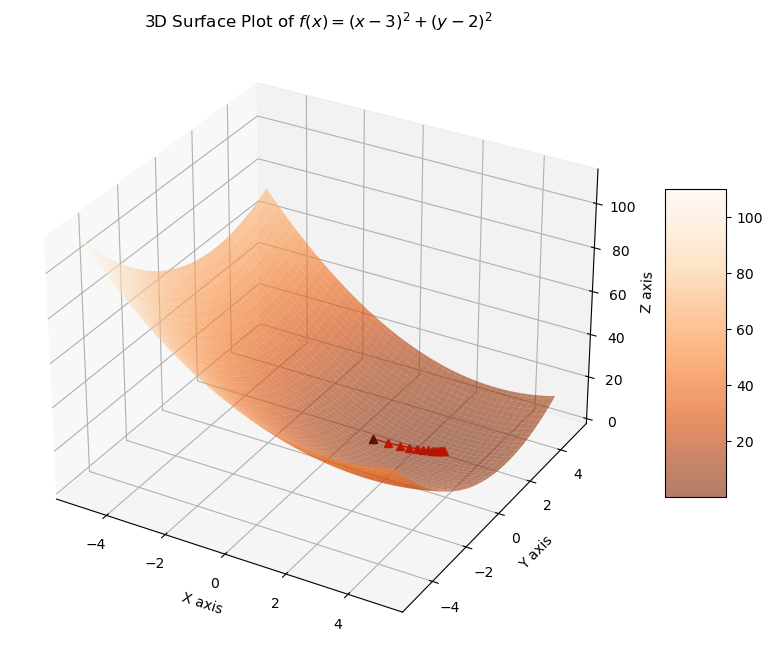

In [31]:
# Visualizing the result 
# Define the range for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# 2. Create the coordinate matrices (Grid)
# X and Y are now 100x100 arrays
X, Y = np.meshgrid(x, y)

# function estimation
Z = func([X, Y])

# Plot here
# Create a new figure
fig = plt.figure(figsize=(10, 8))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, alpha= 0.6, cmap='Oranges_r', edgecolor='none', linewidth= 0)
ax.plot(h[0], h[1], h[2], color='red', marker= '^', linewidth= 1, linestyle= '-')
ax.plot(h[0][0], h[1][0], h[2][0], color='k', marker= '^', linewidth= 1, linestyle= '-')
# Add a color bar to show the Z-axis mapping
fig.colorbar(surface, shrink=0.5, aspect=5)

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot of $f(x) = (x-3)^2+(y-2)^2$')

plt.show()

#### Question 2 answer is $(x, y) = (2.89004884, 1.94502442)$

3. Evaluate the following integral $∫_{1}^{2}(x+\frac{2}{x})^2 dx$ using the composite trapezoidal rule, with n = 10.

In [3]:
# Provide solution here

In [35]:
def composite_trapezoidal(func, a, b, n):
    '''
    Finds the definite integral of function, func using the composite trapezoidal method

    Args:
    func(Function): Function to be integrated
    a: lower boundary of the integral
    b: upper boundary of the integral
    n: number of steps to be taken between a and b

    Returns:
    integral(float): The estimated integral
    
    '''
    h = (b-a)/n # interval between two point
    x = a
    func_values = []
    
    for i in range(1, n):
        x = x + h # updates x
        func_values.append(func(x)) # Collects the function estimation 
    d = []
    for j in range(len(func_values)):
        d.append(2 * func_values[j])
    func_values_sum = sum(d)
    integral = h/2 * (func(a) + func_values_sum + func(b))
    return integral

In [38]:
a, b, n = 1, 2, 10
func = lambda x: (x + 2/x)**2
integral = composite_trapezoidal(func, a, b, n)
integral

8.340820509859306

#### Question 3 answer is 8.340820509859306